# Assignment 3 - Supervised Learning

## *Rongsheng Zhang*
Netid:  *rz77*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1-e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model paramters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial dervatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear seperable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. Divide you data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this you'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to?
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient?
3. Stopping criteria - when should the algorithm be finished searching for the optimum?

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different initializations, learning rates, and stopping criteria. What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why?

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing as well as using linear regression. Show ROC curves for both and your model all on one plot. How does your model compare in terms of performance?

**ANSWER**

**(a)**  
$$L = \prod_{i}^{K}(\frac{exp(w^T x_i)}{1+exp(w^T x_i)})^{y_i}(\frac{1}{1+exp(w^T x_i)})^{(1 - y_i)}$$
$$  = \prod_{i}^{K}\frac{exp(w^T x_i y_i)}{(1+exp(w^T x_i))^{y_i}}\frac{1}{(1+exp(w^T x_i))^{(1 - y_i)}}$$
$$  = \prod_{i}^{K}\frac{exp(w^T x_i y_i)}{(1+exp(w^T x_i))}$$

**(b)**  
$$C = -\log(L) = \sum_{i}^{K}\log(1+\exp(w^T x_i)) - w^T x_i y_i$$

**(c)**    
$$ \frac{\partial C}{\partial w_j} = \sum_{i}^{K}\frac{x_{i,j} \exp(w^T x_i)}{1+\exp(w^T x_i)}- y_i x_{i,j} \qquad j = 0,1,2$$
$$\nabla_w C = [\sum_{i}^{K}\frac{x_{i,0} \exp(w^T x_i)}{1+\exp(w^T x_i)}- y_i x_{i,0},\sum_{i}^{K}\frac{x_{i,1} \exp(w^T x_i)}{1+\exp(w^T x_i)}- y_i x_{i,1}, \sum_{i}^{K}\frac{x_{i,2} \exp(w^T x_i)}{1+\exp(w^T x_i)}- y_i x_{i,2}]$$

**(d)**  
$$\mathbf w^n = [w_0^n,w_1^n,w_2^n]$$
where  
$$w_j^n = w_j^{n-1} - \eta \sum_{i}^{K}\frac{x_{i,j} \exp(w^T x_i)}{1+\exp(w^T x_i)}- y_i x_{i,j}$$

**(e)**  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.neighbors import KNeighborsClassifier as KNN
import math

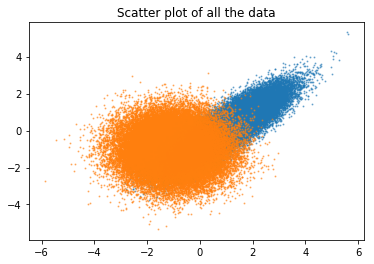

In [2]:
data = pd.read_csv('.\data\A3_Q1_data.csv').values
data_0 = data[data[:,2] == 0]
data_0_x = data_0[:,:2]
data_1 = data[data[:,2] == 1]
data_1_x = data_1[:,:2]
plt.scatter(data_0_x[:,0],data_0_x[:,1],s = 1,alpha = 0.5)
plt.scatter(data_1_x[:,0],data_1_x[:,1],s = 1,alpha = 0.5)
plt.title('Scatter plot of all the data')
plt.show()

Most of the data separate quite well --- the orange points cluster as a circle and the blue points cluster as a line.  
Thus, to some extent, logistic regression could be a decent method because logistic regression will create a linear decision boundary. In this question, a linear boundary seems reasonable and may get a nice performance.

**(f)**  
I think the dataset has no missing values and most of the data reside in reasonable area. There are some outliers but a small number of them is common in data science and I don't think we should remove them. The only preprocessing we need to do may be we should add a column to the dataset so that it can fit the method mentioned above.

**(g)**

In [3]:
def sigmoid(X):
    return 1.0/(1+np.exp(-X))

def cost(X,y,w):
    w = w.reshape(-1,)
    pos = np.log(1+np.exp(np.dot(X,w)))   
    neg = np.dot(X,w) * y.T
    temp = np.sum(pos-neg,axis=0)
    return temp


class Logi_Reg:
    def __init__(self):
        self.feature = []
        self.label = []
        self.w = []
        
    def fit(self,X,y,_thres = 0.001, _step = 0.0001):
        self.feature = X
        self.label = y
#         self.w = self.grad_desc()
        return self.grad_desc(_thres,_step)
    


    def grad_desc(self,_thres,_step):
        X = self.feature
        y = self.label
        step = _step
        _,p = X.shape
        w = np.ones(shape=(p,))
        w_mat = []
        thres = _thres
        error = 100
        err_change = 100
        cost_mat = []
        while err_change > thres:
            temp = error
            h = sigmoid(np.dot(X,w))
            error = h - y
            err_change = abs(max(temp - error))
            w = w - step * np.dot(X.T,error)
            w_mat.append(w)

        return w_mat
                
    def predict(self,X,w):
        N,_ = X.shape
        proba = np.exp(np.dot(X,w))/(1+np.exp(np.dot(X,w)))

        return proba

In [4]:
data = pd.read_csv('.\data\A3_Q1_data.csv').values
N,_ = data.shape
data = np.c_[np.ones(shape=(N,)),data]
data_train = data[:70000,:]
X_train = data_train[:,:3]
y_train = data_train[:,3]
data_test = data[70000:,:]
X_test = data_test[:,:3]
y_test = data_test[:,3]
cl = Logi_Reg()
w = cl.fit(X_train,y_train)
w = np.array(w)
p = cl.predict(X_test,w[-1])

In [104]:
for i in range(0,len(w)):
    print("The cost in training data is {}".format(cost(X_train,y_train,w[i])))
    print("The cost in test data is {}".format(cost(X_test,y_test,w[i])))

The cost in training data is 50861.67969734286
The cost in test data is 21583.892616282617
The cost in training data is 42041.92878677652
The cost in test data is 17793.522729718796
The cost in training data is 36212.03877937573
The cost in test data is 15288.4469468059
The cost in training data is 32497.743913881473
The cost in test data is 13700.051961818048
The cost in training data is 30017.74443167136
The cost in test data is 12649.150871923788
The cost in training data is 28155.94242970059
The cost in test data is 11867.409215867634
The cost in training data is 26640.566879560934
The cost in test data is 11235.056170183505
The cost in training data is 25412.831331034937
The cost in test data is 10724.902226777245
The cost in training data is 24475.421628812008
The cost in test data is 10337.018924804921
The cost in training data is 23821.073158527597
The cost in test data is 10067.866145444112
The cost in training data is 23412.797627861357
The cost in test data is 9901.565937809

**(k)**  
In my experiment above, I choose the parameters as following:  
The initial value of w is all ones;  
The learning rate is 0.0001;  
The stop criteria is that the algorithm will stop when the error is less than 0.001.  
  
I think the intial value has no significant impact on the algorithm. It only make the algorithm converge faster or slower by constant steps. So I choose to use a relatively simple initialization.  
The learning rate will determine the converge rate. A large learning rate may cause faster convergence but it may also cause the algorithm stuck.  

In [5]:
w = cl.fit(X_train,y_train,0.1)
w = np.array(w)
p = cl.predict(X_test,w[-1])
for i in range(0,len(w)):
    print("The cost in training data is {}".format(cost(X_train,y_train,w[i])))
    print("The cost in test data is {}".format(cost(X_test,y_test,w[i])))

The cost in training data is 50861.67969734286
The cost in test data is 21583.892616282617
The cost in training data is 42041.92878677652
The cost in test data is 17793.522729718796
The cost in training data is 36212.03877937573
The cost in test data is 15288.4469468059
The cost in training data is 32497.743913881473
The cost in test data is 13700.051961818048
The cost in training data is 30017.74443167136
The cost in test data is 12649.150871923788
The cost in training data is 28155.94242970059
The cost in test data is 11867.409215867634
The cost in training data is 26640.566879560934
The cost in test data is 11235.056170183505
The cost in training data is 25412.831331034937
The cost in test data is 10724.902226777245


In [6]:
w = cl.fit(X_train,y_train,0.001,0.00001)
w = np.array(w)
p = cl.predict(X_test,w[-1])
for i in range(0,len(w)):
    print("The cost in training data is {}".format(cost(X_train,y_train,w[i])))
    print("The cost in test data is {}".format(cost(X_test,y_test,w[i])))

The cost in training data is 85095.75480122858
The cost in test data is 36451.27270978602
The cost in training data is 51439.82533210314
The cost in test data is 22002.52687005725
The cost in training data is 37744.66038673529
The cost in test data is 16120.30347611758
The cost in training data is 32289.784864077224
The cost in test data is 13770.977082970556
The cost in training data is 29534.555615558933
The cost in test data is 12582.890103830745
The cost in training data is 27885.032629881414
The cost in test data is 11871.107437893694
The cost in training data is 26793.4532389155
The cost in test data is 11399.759067010766
The cost in training data is 26023.649358152124
The cost in test data is 11067.079646677495
The cost in training data is 25456.573364914348
The cost in test data is 10821.767091325932
The cost in training data is 25025.381466775492
The cost in test data is 10635.020255583187
The cost in training data is 24689.50984435733
The cost in test data is 10489.3649634959

Here I choose to change the learning rate and stop criteria respectively.  
As we can see, when we change the learning rate to a large number, the algorithm converges faster. But as a consequence, the cost increases. That is because the large learning rate make the algorithm difficult to get the 'optimal' value.  
In the second experiment, we change the stop criteria to a small number and it takes a much loner time to converge. And the cost in smaller compared with the original one.  
In the experiment, I think the number I choose in the very first place is the best, that is because the algorithm converges relatively fast without suffering from a much higher cost.

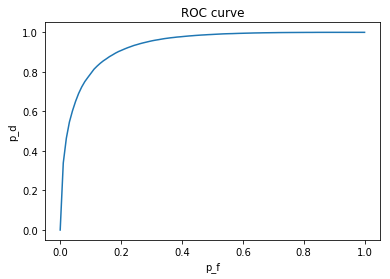

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

X = data[:,:3]
label = data[:,3]
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, label)
clf = Logi_Reg()

thres = np.arange(0, 1, 0.01)
tprs = []
mean_fpr = np.linspace(0, 1, 100)
fold_n = 0
for train_index, test_index in skf.split(X,label):
    w = clf.fit(X[train_index,:],label[train_index])
    w = np.array(w)
    y = clf.predict(X[test_index,:],w[-1])
#     y = y[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(label[test_index],y)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0

plt.plot(mean_fpr,mean_tpr)
plt.title('ROC curve')
plt.xlabel('p_f')
plt.ylabel('p_d')
plt.show()

We use cross validation because it may generate a more reliable evalution of the performance. If we just separate the dataset once, it is highly possible that the dataset has a highly different distribution in training and testing data. And cross validation can help us prevent getting a unreliable evaluation.

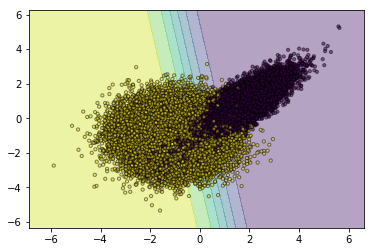

In [17]:
data = pd.read_csv('.\data\A3_Q1_data.csv').values
feature_train = data[:70000,:2]
label_train = data[:70000,2]
feature_test = data[70000:,:2]
label_test = data[70000:,2]

clf = Logi_Reg()
w = clf.fit(feature_train,label_train)
w = np.array(w)


x_min, x_max = feature_train[:, 0].min() - 1, feature_train[:, 0].max() + 1
y_min, y_max = feature_train[:, 1].min() - 1, feature_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()],w[-1])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(feature_train[:, 0], feature_train[:, 1], s=10, c=label_train, edgecolor='k',alpha = 0.5)
plt.title("plot for the trainning data")
plt.show()

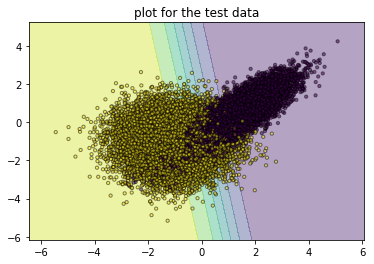

In [19]:
clf = Logi_Reg()
w = clf.fit(feature_train,label_train)
w = np.array(w)


x_min, x_max = feature_test[:, 0].min() - 1, feature_test[:, 0].max() + 1
y_min, y_max = feature_test[:, 1].min() - 1, feature_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()],w[-1])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(feature_test[:, 0], feature_test[:, 1], s=10, c=label_test, edgecolor='k',alpha = 0.5)
plt.title("plot for the test data")
plt.show()

The decision boundary seems better in the training data, which is reasonable because the w parameter is generated from the trainning data.  
The boundary could do better by increasing its flexibility for that a more winding curve may fit the 'true' boundary better.

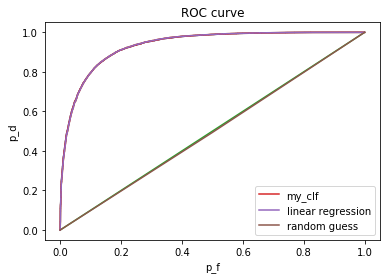

In [28]:
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics


clf = Logi_Reg()

w = clf.fit(feature_train,label_train)
w = np.array(w)
y = clf.predict(feature_test,w[-1])
fpr, tpr, thresholds = metrics.roc_curve(label_test,y)

plt.plot(fpr,tpr,label='my_clf')


lr = linear_model.LinearRegression()
lr.fit(feature_train,label_train)
y_lr = lr.predict(feature_test)
fpr, tpr, thresholds = metrics.roc_curve(label_test,y_lr)
plt.plot(fpr,tpr,label='linear regression')

rand_guess = np.random.randint(0,2,(30000,))
fpr, tpr, thresholds = metrics.roc_curve(label_test,rand_guess)
plt.plot(fpr,tpr,label='random guess')

plt.title('ROC curve')
plt.xlabel('p_f')
plt.ylabel('p_d')
plt.legend()
plt.show()

As we can see, our classifier has a similar performance with the linear regression and both of them have a relative nice performance in ROC curve.  
The random guess curve is just a diagonal curve, which is no surprise. When you random guess the label, the $P_d$ and $P_f$ will increase simultaneously and that is why the curve is a diagonal.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a linear model classifier (e.g. logistic regression) apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) Area Under the Curve (AUC). Describe the implications of your findings.

**ANSWER**

In [30]:
import numpy as np
import struct
import matplotlib.pyplot as plt


def readfile():
    with open(r'F:\ece590\gitlab\RongshengZhang\train-images.idx3-ubyte','rb') as f1:
        buf1 = f1.read()
    with open(r'F:\ece590\gitlab\RongshengZhang\train-labels.idx1-ubyte','rb') as f2:
        buf2 = f2.read()
    return buf1, buf2


def get_image(buf1):
    image_index = 0
    image_index += struct.calcsize('>IIII')
    im = []
    for i in range(10000):
        temp = struct.unpack_from('>784B', buf1, image_index) # '>784B'的意思就是用大端法读取784个unsigned byte
        im.append(np.reshape(temp,(28,28)))
        image_index += struct.calcsize('>784B')  # 每次增加784B
    return im


def get_label(buf2): # 得到标签数据
    label_index = 0
    label_index += struct.calcsize('>II')
    return struct.unpack_from('>10000B', buf2, label_index)



In [31]:
image_data, label_data = readfile()
im = np.asarray(get_image(image_data))
label = np.asarray(get_label(label_data))
label[label != 3] = 0
label[label == 3] = 1

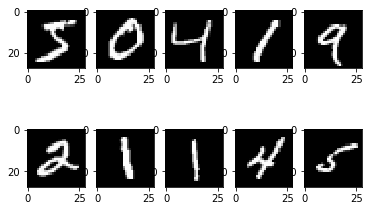

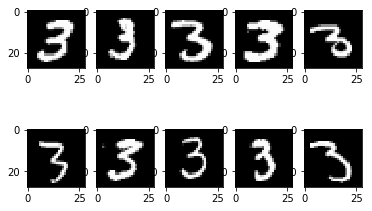

In [32]:
im_0 = im[label == 0]
im_1 = im[label == 1]
fig1 = plt.figure()
for i in range(1,11):
    plotwindow = fig1.add_subplot(2,5,i)
    plt.imshow(im_0[i-1],cmap = 'gray')
fig2 = plt.figure()
for i in range(1,11):
    plotwindow = fig2.add_subplot(2,5,i)
    plt.imshow(im_1[i-1],cmap = 'gray')
plt.show()

In [34]:
num_1,_,_ = im_1.shape
num_0,_,_ = im_0.shape
print("There are {} samples of number '3' and {} samples of non-3s".format(num_1,num_0))

There are 1032 samples of number '3' and 8968 samples of non-3s


The numbers of 3-samples and non-3 samples are not balanced. That may cause the training data unbalanced and the classifier may have little information about 'what makes a positive sample', which will cause the classifier less confident to make the decision.

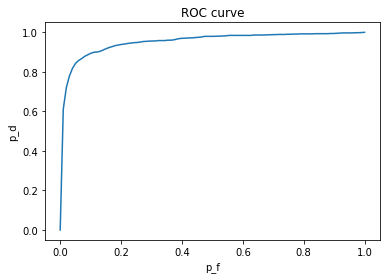

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

X = im.reshape(-1,784)
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, label)
clf = linear_model.LogisticRegression()

tprs = []
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in skf.split(X,label):
    clf.fit(X[train_index,:],label[train_index])
    y = clf.predict_proba(X[test_index,:])
    y = y[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(label[test_index],y)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0

plt.plot(mean_fpr,mean_tpr)
plt.title('ROC curve')
plt.xlabel('p_f')
plt.ylabel('p_d')

plt.show()

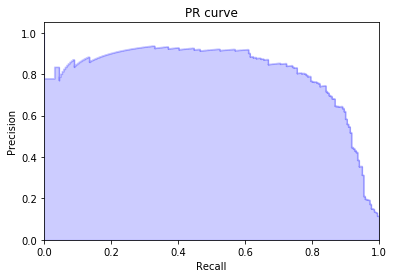

In [79]:
X_train = X[:8000,:]
label_train = label[:8000,]
X_test = X[8000:,:]
label_test = label[8000:,]

clf.fit(X_train,label_train)
y = clf.predict_proba(X_test)
y = y[:,1]

precision, recall, _ = precision_recall_curve(label_test, y)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show()

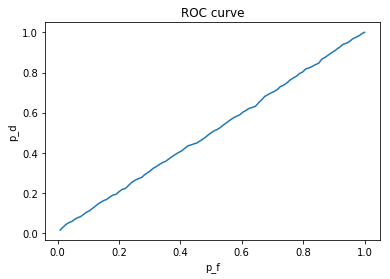

In [41]:
thres = np.arange(0,1,0.01)
randguess = np.random.random((1,len(label)))
randlabel = np.tile(randguess,(len(thres),1))
thres_mat = np.tile(thres,(len(label),1)).T
randlabel = randlabel - thres_mat
randlabel[randlabel >= 0] = 1
randlabel[randlabel < 0] = 0
pd = np.zeros(shape=(len(thres.flat),))
pf = np.zeros(shape=(len(thres.flat),))
rand_hat_3_mat = np.asarray(np.where(randlabel == 1))
acc_3 = np.asarray(np.where(label == 1))
acc_3_set = set(acc_3.flat)
acc_not_3 = np.asarray(np.where(label == 0))
acc_not_3_set = set(acc_not_3.flat)
for i in range(0,100):
    rand_hat_3 = rand_hat_3_mat[:,rand_hat_3_mat[0,:] == i]
    pd[i] = len((set(rand_hat_3[1,:].flat) & acc_3_set))/len(acc_3.flat)
    pf[i] = len((set(rand_hat_3[1,:].flat) & acc_not_3_set))/len(acc_not_3.flat)
    
plt.plot(pf,pd)
plt.title('ROC curve')
plt.xlabel('p_f')
plt.ylabel('p_d')
plt.show()

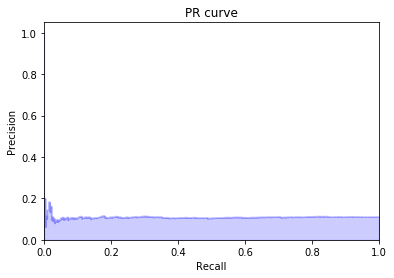

In [78]:
randguess_test = np.random.random((len(label_test),))
precision, recall, _ = precision_recall_curve(label_test, randguess_test)


plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show()

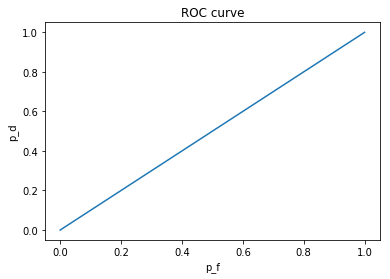

In [47]:
non_3 = 3*np.ones(shape=(len(label),))
fpr, tpr, thresholds = metrics.roc_curve(label,non_3)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('p_f')
plt.ylabel('p_d')
plt.show()

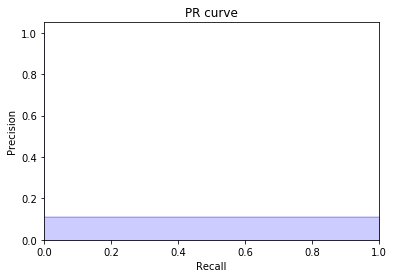

In [77]:
precision, recall, _ = precision_recall_curve(label_test, non_3[8000:])


plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show()

As we can see in those pictures above, the logistic classifier has a nice ROC curve --- it has a concave shape. However, the random-guess model and the non-3 model have a relatively useless ROC curve. Those two classifiers get no information from the dataset.  
For the PR curve, the logistic classifier has a relatively nice performance, which matches its performance in ROC curve. For the other two classifier, the rate will remain about 10%, which is exactly the frequency of 3 in 10 numbers.

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

clf1 = linear_model.LogisticRegression(penalty = 'l1',tol = 0.001, C = 0.5)
clf2 = linear_model.LogisticRegression(penalty = 'l1',tol = 0.0001, C = 1)

clf1.fit(X_train,label_train)
coef_1 = np.array(clf1.coef_)
zero_mat = np.zeros(shape=(1,784))
non_zero_1 = 784 - np.sum(np.equal(coef_1,zero_mat))
cost_1 = cost(X_test,label_test,coef_1)
y_1 = clf1.predict(X_test)
f1_clf1 = f1_score(label_test, y_1)
auc_clf1 = roc_auc_score(label_test, y_1)

clf2.fit(X_train,label_train)
coef_2 = np.array(clf2.coef_)
# zero_mat = np.zeros(shape=(1,784))
non_zero_2 = 784 - np.sum(np.equal(coef_2,zero_mat))
cost_2 = cost(X_test,label_test,coef_2)
y_2 = clf2.predict(X_test)
f1_clf2 = f1_score(label_test, y_2)
auc_clf2 = roc_auc_score(label_test, y_2)

In [73]:
print("For C = 0.5, tol  = 0.001, the results are: ")
print('The number of non_zero parameters are {}'.format(non_zero_1))
print("The cost of the classifier is {}".format(cost_1))
print("The f1 score of the classifier is {}".format(f1_clf1))
print("The AUC of the classifier is {}".format(auc_clf1))

For C = 0.5, tol  = 0.001, the results are: 
The number of non_zero parameters are 525
The cost of the classifier is 2457.758681885719
The f1 score of the classifier is 0.8096280087527352
The AUC of the classifier is 0.9042181407522147


In [75]:
print("For C = 1, tol  = 0.0001, the results are: ")
print('The number of non_zero parameters are {}'.format(non_zero_2))
print("The cost of the classifier is {}".format(cost_2))
print("The f1 score of the classifier is {}".format(f1_clf2))
print("The AUC of the classifier is {}".format(auc_clf2))

For C = 1, tol  = 0.0001, the results are: 
The number of non_zero parameters are 507
The cost of the classifier is 10251.656862801861
The f1 score of the classifier is 0.7838983050847458
The AUC of the classifier is 0.9000022891501912


As we can see, the classifier with smaller C and larger tol will have more parameters that estimates to be non-zero. Also, its cost is smaller, which means it has more confidence in its predictions. In accordance with these, the f1 score of the first classifier is higher and the AUC of it is larger, which all lead to a similar conclusion: a smaller C and larger tol may promise a better performance. That conclusion matches our therotical analysis.  
For the second classifier, we can deduce that it has a faster computing time and will make quick predictions.  
In conclusion, there is no classifier that has comprehensive advantages over all other classifiers --- it depends on what characteristics we are most interested in.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performend, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to descrive this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

In this question, I would like to delve into a mushroom classification problem.
<img style="width:200px;height:280px;float:center" src="mushroom.jpg">


## **Preface**  
Mushroom is a common ingredients all over the world. Different cultures have various methods to cook mushrooms. While so many people enjoy the delicacy from mushrooms, there could be some problems.  
As we know, mushroom is a kind of fugus, and not all of the mushrooms are edible. There are a lot of kinds of mushrooms that are poisonous --- some of them may just cause diarrhea or hallucination, but some could have extremly severe consequences.  
In some areas, especially tropical areas, mushrooms can be found in almost every meal. However, there are also thousands of accidents of having mushrooms. Some mild symptoms may just lead to a funny discussion on the Internet, but those severe accidents may cost lives.  
There are so many kinds of mushrooms and it is impossible for a common citizen with no professional knowledge to tell edible and poisonous mushrooms apart correctly. There are some rumors like 'Beautiful mushrooms are poisonous and colorless mushrooms are edible.' That might be true but could not make a scientific explanation.  
Given those situations, I would like to use some of the methods in machine learning to find a method that can recognize those poisonous mushrooms in a reasonable manner.  
This problem can be addressed using classification, since it is a supervised learning and it basically deals with 'yes or no' question.

## **General description of the dataset**  
I found this mushroom dataset in UCI archives. The first column in this csv file is the class of the mushroom, i.e. edible or poisonous. This dataset has 22 features, such as gill-size, number of rings and habitat, which matches our common sense for that mushrooms could vary in so many different aspects.

## **Supervised learning question formulation**  
In this question, our target is to classify mushrooms, which means we would need to predict a certain type of mushroom to be an edible one or a poisonous one, based on the features provided.  
To be more specific, our target variable is 'class', which is the first column in the dataset. We have over 20 features to help us classify the class. However, due to the time limit and the code efficiency, I would like to choose part of the features as our predictors, so that we can get a general concept of this classification problem.  
In particular, I choose 'bruises','gill-size','veil-type','stalk-shape','cap-shape','cap-surface' and 'ring number' as our predictors, which I think is a reasonable number of features --- not too large to cause overfitting or too small to lose generality.  
This dataset has no missing data or erroneous data, but it still needs some preprocessing to make it better fit the classifier, which we will talk about later.

## **Some plots of the data**  
Here, I would like to plot some of the features in the dataset to see if there are some obvious separations. If there exists, then a machine learning method may not be necessary --- we can basically use those separated features to tell mushrooms apart.

### **preprocessing of the data**  
Among those features, there are 3 of them that have only 2 possible values, which means we can simply set 0 or 1 to them. For those features that have more than 2 possible values, we can separate those features into subfeatures and use a vector to represent them. For example, cap-surface has 4 possible values: fibrous, grooves, scaly, smooth. We cannot simply set 0 or 1 to them. Also, it will be difficult to directly set them as a column vector with 4 elements. So here, we will separate this specific feature as 4 distinct features --- a mushroom with 'fibrous' cap-surface will be set as '1 0 0 0 ' and a 'scaly' mushroom will be set as '0 0 1 0'.  
Using these methods, we can preprocess the data so that we can fit them into a classifier.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold


In [6]:
'''data preparation'''
df = pd.read_csv('.\mushrooms_mod.csv')
df = df.loc[:,['class','bruises','gill-size','veil-type','stalk-shape','bell','conical','convex','flat',
               'knobbed','sunken','fibrous','grooves','scaly','smooth','ring-number']]
df['class'] = df['class'].replace('e',1)
df['class'] = df['class'].replace('p',0)
df['bruises'] = df['bruises'].replace('t',1)
df['bruises'] = df['bruises'].replace('f',0)
df['gill-size'] = df['gill-size'].replace('b',1)
df['gill-size'] = df['gill-size'].replace('n',0)
df['stalk-shape'] = df['stalk-shape'].replace('e',1)
df['stalk-shape'] = df['stalk-shape'].replace('t',0)
df['veil-type'] = df['veil-type'].replace('p',1)
df['veil-type'] = df['veil-type'].replace('u',0)


data = df.values
label = data[:,0].reshape(-1,)
feature = data[:,1:]

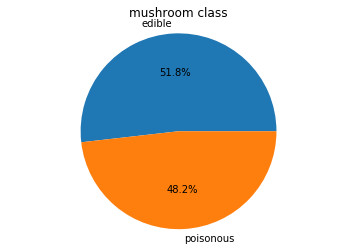

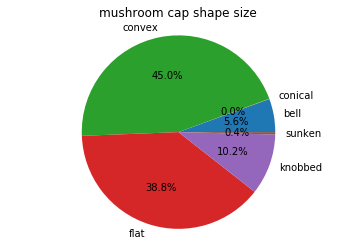

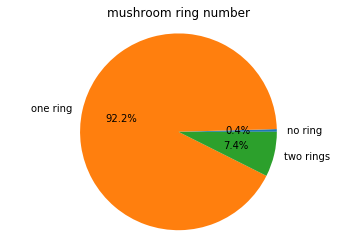

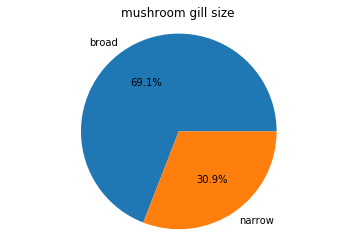

In [8]:
'''pie chart plotting'''
class_label = ['edible','poisonous']
eatable_num = len(label[label ==1 ])
poison_num = len(label[label == 0])
class_size = [eatable_num,poison_num]

cap_shape_label = ['bell','conical','convex','flat',
               'knobbed','sunken']
bell_num = len((feature[:,4])[feature[:,4] == 1])
conical_num = len((feature[:,5])[feature[:,5] == 1])
convex_num = len((feature[:,6])[feature[:,6] == 1])
flat_num = len((feature[:,7])[feature[:,7] == 1])
knobbed_num = len((feature[:,8])[feature[:,8] == 1])
sunken_num = len((feature[:,9])[feature[:,9] == 1])
cap_shape_size = [bell_num,conical_num,convex_num,flat_num,knobbed_num,sunken_num]

ring_num_label = ['no ring','one ring','two rings']
zero_num = len((feature[:,-1])[feature[:,-1] == 0])
one_num = len((feature[:,-1])[feature[:,-1] == 1])
two_num = len((feature[:,-1])[feature[:,-1] == 2])
ring_num_size = [zero_num,one_num,two_num]

gill_size_label = ['broad','narrow']
broad_num = len((feature[:,1])[feature[:,1] == 1])
narrow_num = len((feature[:,1])[feature[:,1] == 0])
gill_size_size = [broad_num,narrow_num]

plt.pie(class_size,labels = class_label,autopct = '%3.1f%%')
plt.axis('equal')
plt.title('mushroom class')

plt.figure()
plt.pie(cap_shape_size,labels = cap_shape_label,autopct = '%3.1f%%')
plt.axis('equal')
plt.title('mushroom cap shape size')

plt.figure()
plt.pie(ring_num_size,labels = ring_num_label,autopct = '%3.1f%%')
plt.axis('equal')
plt.title('mushroom ring number')

plt.figure()
plt.pie(gill_size_size,labels = gill_size_label,autopct = '%3.1f%%')
plt.axis('equal')
plt.title('mushroom gill size')

plt.show()

From those pie charts, we can find that there is no significant separation between those features --- which means we cannot simply use one single feature to tell mushrooms apart. 

## **Supervised learning technique choosing**  
In this question, I would like to use Logistic Regression to classify those mushrooms.  
First, this question is a binary classification problem, which perfectly matches the usage of logistic regression.  
Second, there are about 8000 samples in the dataset, which is a reasonable number to use logistic regression --- we will not suffering from  waiting forever for the calculation of gradient descent.
Third, compared with KNN, logistic regression has a relatively fast computing time, so that we can know whether the mushroom is poisonous before we have already eatten them up.  
Last but not least, well........ logistic regression is one of the only two machine learning techniques I have learned. I have no idea how to use other advanced techniques. Maybe I will try some fancy methods in the future.

## **Performance evaluating**  
Since this is a classification problem, it is rational to use ROC curve to evaluate the performance of the classifier.  
To be specific, I set edible mushrooms as label 0 and poisonous mushrooms as label 1. So the probability of correct detection should be seen as 'is poisonous and labelled poisonous', while the probability of false alarm should be regarded as 'is edible but labelled poisonous'. By this way, we are supposed to make $P_d$ as high as possible for that this has a much higher penality.

## **Cross validation**  
In this question, I choose to use cross validation instead of simply separate the dataset into training and testing.  
Cross-validation, sometimes called rotation estimation,is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set). The goal of cross validation is to define a dataset to "test" the model in the training phase (i.e., the validation set), in order to limit problems like overfitting[citation needed], give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem), etc. (Wikipedia)  
The reason I choose to use cross validation is that the dataset has only 8000 samples, which is a quite limited number of samples. If we simply divide the dataset, it may cause the performance being quite inaccurate.  
To be specific, I will set the n_split as 8, since there are about 8000 thoudsand samples and each set will have about 1000 samples.

## **Implementation  and Analysis**  

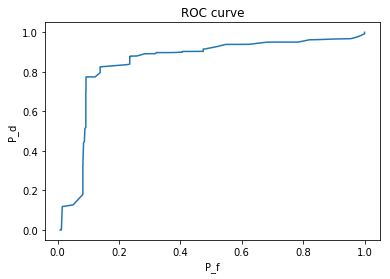

In [14]:
'''cross validation and ROC plot'''
kf = StratifiedKFold(n_splits=8)
kf.get_n_splits(feature,label)
thres = np.arange(0, 1, 0.01)

pd_temp = np.zeros(shape=(8,len(thres)))
pf_temp = np.zeros(shape=(8,len(thres)))
fold_n = 0

for train_index,test_index in kf.split(feature,label):
    feature_train = feature[train_index,:]
    label_train = label[train_index]
    feature_test = feature[test_index,:]
    label_test = label[test_index]

    clf = linear_model.LogisticRegression()
    clf.fit(feature_train,label_train)

    label_hat = clf.predict_proba(feature_test)
    label_hat = label_hat[:,1]

    # thres = np.arange(0,1,0.01)
    # pd = np.zeros(shape=(len(thres),))
    # pf = np.zeros(shape=(len(thres),))
    index = 0
    for i in thres:
        a = label_hat.copy()
        a[a>=i] = 1
        a[a<i] = 0

        eatable_hat = np.array(np.where(a == 1))
        eatable_acc = np.array(np.where(label_test == 1))
        poison_acc = np.array(np.where(label_test == 0))

        pd_temp[fold_n,index] = len(set(eatable_acc.flat) & set(eatable_hat.flat))/len(eatable_acc.flat)
        pf_temp[fold_n,index] = len(set(poison_acc.flat) & set(eatable_hat.flat))/len(poison_acc.flat)
        index = index + 1
    fold_n = fold_n + 1

pd = np.sum(pd_temp,axis=0)/8
pf = np.sum(pf_temp,axis=0)/8

plt.plot(pf,pd)
plt.title('ROC curve')
plt.xlabel('P_f')
plt.ylabel('P_d')
plt.show()

### **Analysis**
In this plot, we can find that the performance of the classifier is quite good --- we can get a general idea of how to classify a mushroom with given features. As we can see, $P_d$ reaches about 90% when $P_f$ is 30%, which means we can almost recognize those poisonos mushrooms without throwing away too many edible mushrooms.  
Although we can get some 'knowledge' from using this machine learning method, there still exists several problems that need to be solved.  
First, the ROC curve goes up not very fast, so we cannot 'confidently' treat one specific type of mushroom as poisonous.  
Second, the ROC curve reaches over 95% with a relatively high value of $P_f$. The rest 5% seems to be a tiny number, but the penalty is quite high --- a miss alarm of poisonous mushroom can cost lives.  
There are several aspects that we could do to improve the performance. First, I just use about half of the features given in the dataset to get a 'general' idea. Maybe taking all the features included could have a better performance since some other feature may be a quite important predictor. Second, I choose to use logistic regression to train the classifier, and that could be a quite basic one. An advanced algorithm may bring better performance and classify the mushrooms more correctly.

## **Summary**  
In this question, we delve into a mushroom classification problem.  
First, we make some preprocessing to the dataset so that it can fit better to our machine learning method.  
Then, we choose to use logistic regression to study this binary classification problem.  
By using cross validation, we can have a more reliable evaluation of the performance of our model.  
The ROC curve of the model shows us that the logistic regression can have a decent performance in this question and it can successfully tell most of the edible and poisonous mushrooms apart.  
In the future, we could try to put all the features in this dataset into the classifier or use some more advanced algorithms to train the model.